# Making Charts with Pandas

## Line chart

In [68]:
import pandas as pd
user_df = pd.read_csv("https://raw.githubusercontent.com/p4css/py4css/main/data/twitter_user1_hashed.csv")
user_df['account_creation_date'] = pd.to_datetime(user_df['account_creation_date'], format="%Y-%m-%d")
user_df['account_creation_ym'] = user_df['account_creation_date'].dt.to_period("M")

In [69]:
sum_df = user_df.groupby('account_creation_ym')['userid'].count().reset_index(name='n')
print(type(sum_df))
sum_df

<class 'pandas.core.frame.DataFrame'>


,account_creation_ym,n
0,2008-05,1
1,2008-07,1
2,2008-11,1
3,2009-01,1
4,2009-02,1
...,...,...
98,2019-01,8
99,2019-02,12
100,2019-03,4
101,2019-04,4


In [70]:
month_count = user_df['account_creation_ym'].value_counts().reset_index(name='n')
month_count = month_count.sort_values('index', ascending=True)

<AxesSubplot:xlabel='index'>

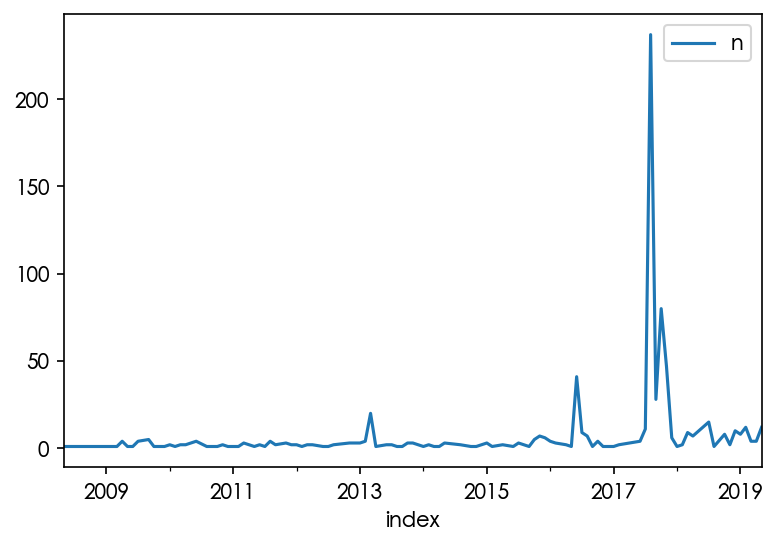

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
month_count.plot(x = 'index', y = 'n')

<AxesSubplot:xlabel='index'>

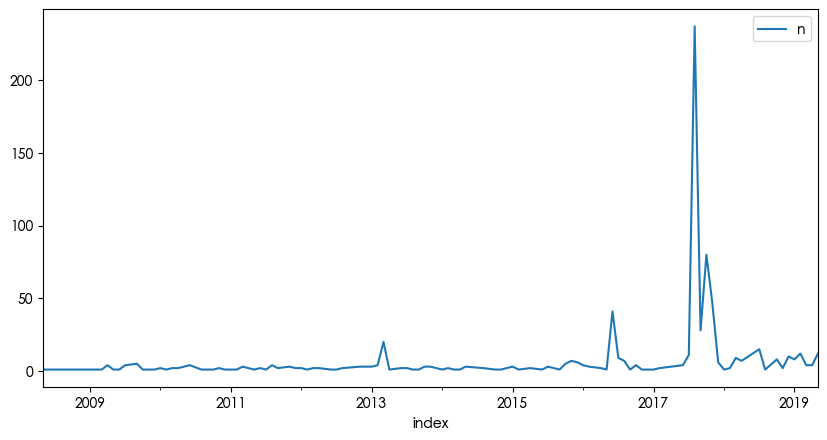

In [77]:
plt.rcParams['figure.dpi'] = 100
month_count.plot(x = 'index', y = 'n', figsize=(10, 5))

### Plot resolution

* https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
* Best result: `plt.savefig('filename.pdf')`
* To png: `plt.savefig('filename.png', dpi=300)`

Adjust resolution
* For saving the graph: `matplotlib.rcParams['savefig.dpi'] = 300`
* For displaying the graph when you use plt.show(): `matplotlib.rcParams["figure.dpi"] = 100`

<AxesSubplot:xlabel='index'>

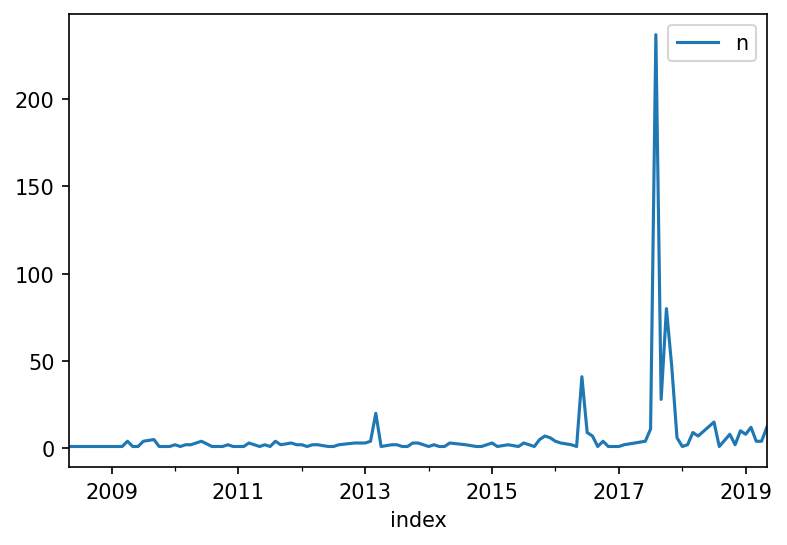

In [63]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
month_count.plot(x = 'index', y = 'n')
# plt.savefig("fig.pdf")

## Bar chart

In [42]:
lang_count = user_df['account_language'].value_counts().reset_index(name="n").sort_values('n', ascending=False).rename(columns={"index":"account_language"})
lang_count

,account_language,n
0,zh-cn,569
1,en,104
2,ru,36
3,zh-CN,13
4,zh-tw,10
5,es,8
6,en-gb,3
7,ja,1


<AxesSubplot:xlabel='account_language'>

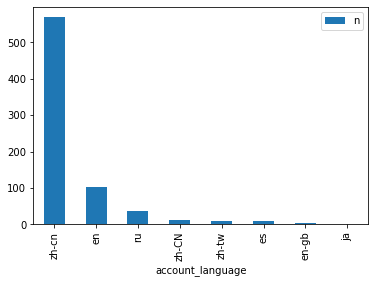

In [46]:
lang_count.plot(kind="bar", x="account_language")

### Coordinate-flip

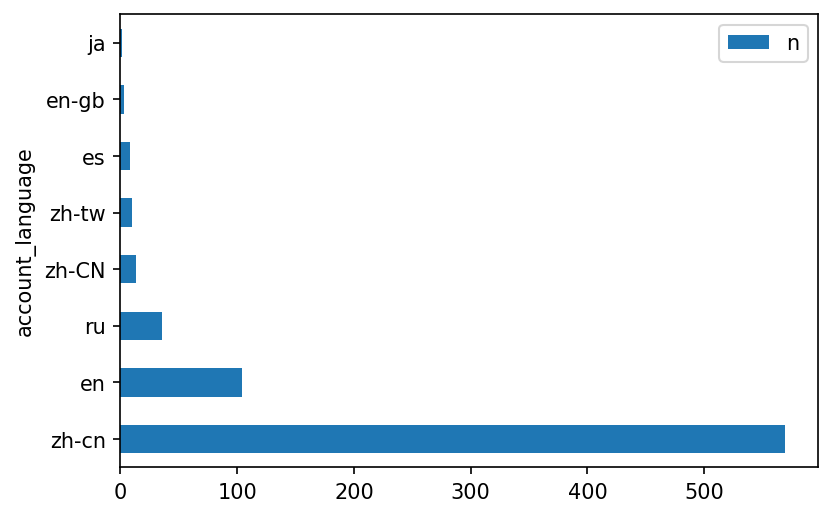

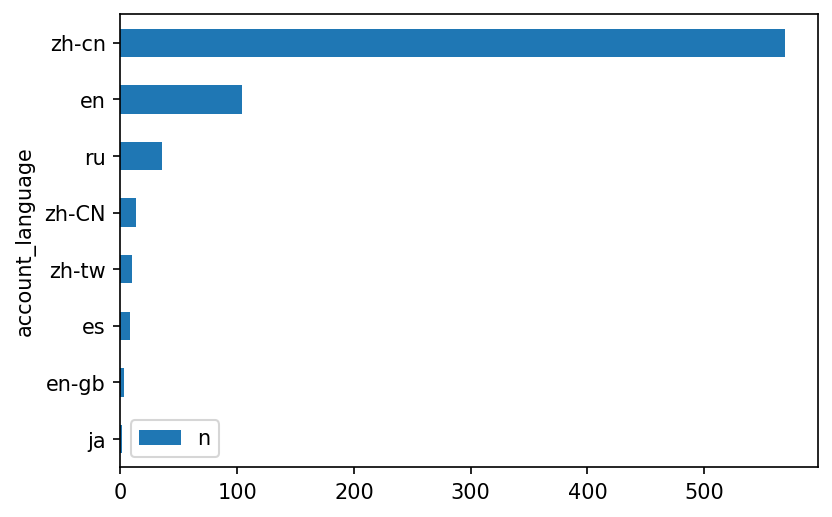

In [64]:
lang_count.plot(kind="barh", x="account_language")
lang_count.plot.barh(x="account_language").invert_yaxis()

plt.show()

## Plot with Chinese font

In [65]:
import pandas as pd
drug_df = pd.read_csv('https://raw.githubusercontent.com/p4css/py4css/main/data/drug_156_2.csv')
pat1 = '代購|帶回'
pat2 = '蝦皮|露天|拍賣|YAHOO|商店街'
filtered_drug_df = drug_df.loc[drug_df['違規產品名稱'].str.contains(pat=pat1, na=False) & 
                               drug_df['刊播媒體'].str.contains(pat=pat2, na=False)]
filtered_drug_df

,違規產品名稱,違規廠商名稱或負責人,處分機關,處分日期,處分法條,違規情節,刊播日期,刊播媒體類別,刊播媒體,查處情形
2,✈日本 代購 參天製藥 處方簽點眼液,蘇O涵/蘇O涵,NaN,01 25 2022 12:00AM,NaN,無照藥商,08 27 2021 12:00AM,網路,蝦皮購物,NaN
3,✈日本 代購 TSUMURA 中將湯 24天包裝,蘇O涵/蘇O涵,NaN,01 25 2022 12:00AM,NaN,無照藥商,08 27 2021 12:00AM,網路,蝦皮購物,輔導結案
4,_Salty.shop 日本代購 樂敦小花,曾O嫺/曾O嫺,NaN,02 17 2022 12:00AM,藥事法第27條,無照藥商,12 6 2021 12:00AM,網路,蝦皮購物,處分結案
9,現貨正品 Eve 快速出貨 日本代購 白兔60 藍兔 40 eve 金兔 EVE 兔子 娃娃...,張O恩/張O恩,NaN,03 4 2022 12:00AM,NaN,無照藥商,12 21 2021 12:00AM,網路,蝦皮拍賣網站,輔導結案
18,[海外代購]纈草根膠囊-120毫克-240粒-睡眠,江O君/江O君,NaN,03 15 2022 12:00AM,NaN,無照藥商,08 2 2021 12:00AM,網路,蝦皮購物,NaN
...,...,...,...,...,...,...,...,...,...,...
2947,「泰國代購🇹🇭」泰國🇹🇭Hirudoid強效去疤膏（預購）,魏O芝/魏O芝,NaN,06 5 2020 12:00AM,藥事法第27條,無照藥商,12 17 2019 12:00AM,網路,蝦皮購物,處分結案
2948,eBuy美國代購美国正品GNC银杏叶精华提高增强记忆力预防老年痴呆补脑健脑,蕭O雄/蕭O雄,NaN,NaN,NaN,無照藥商,03 9 2020 12:00AM,網路,蝦皮購物,NaN
2957,【現貨】H&H 久光 Hisamitsu酸痛舒緩貼布 120枚 140枚 痠痛 舒緩 貼布 ...,胡OO/胡OO,NaN,07 16 2020 12:00AM,藥事法第27條,無照藥商,02 27 2020 12:00AM,網路,蝦皮購物,處分結案
2965,美國代購 ，9:5%折扣落建髮洗，兩款都有,陳O鵬/陳O鵬,NaN,07 16 2020 12:00AM,NaN,藥品未申請查驗登記,04 16 2020 12:00AM,網路,樂購蝦皮股份有限公司,輔導結案


In [66]:
media_count = filtered_drug_df['刊播媒體'].value_counts().reset_index(name = "n").rename(columns={"index": "media"})

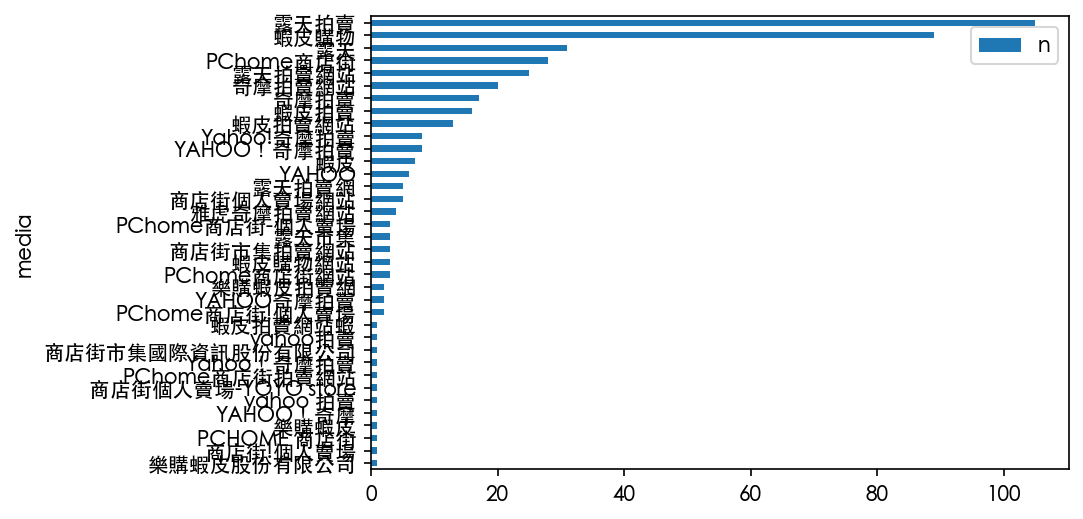

In [67]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['Heiti TC']

media_count.plot.barh(x="media").invert_yaxis()

# plt.show()